# CA-2
GitHub Repo Link- https://github.com/faisal3325/ai2-ca2

## Q1 Text Classification - 2
## Running Non-Negative Matrix Factorization(NMF)

In [388]:
# importing libraries
import pandas as pd # for dataframe
import time # for timer used to calculate execution time
import pickle # for exporting model

In [387]:
# Helper functions

# Timer functions for calculating execution time of models
def time_elapsed_start():
    # Starting the timer
    return time.time()

def time_elapsed_stop(start):
    # Stoping timer and calculating time in
    # seconds, minutes, and hours
    sec = time.time() - start
    min = sec/60
    hour = min/60
    print(f"Execution took {sec} seconds - ({min} minutes), ({hour} hours)")

def save_model(model, model_name):
    # Saving the model to disk
    filename = f'{model_name}.sav'
    pickle.dump(model, open(filename, 'wb'))

In [288]:
# loading data
ROWS_TO_READ = 200000 # total rows to read
df = pd.read_csv('quora_questions.csv', nrows=ROWS_TO_READ) # loading the dataset

In [290]:
df.sample(5)

,question
168037,Can the brain actually be active for a few min...
21900,Will I have to return my GATE stipend if I lea...
21331,What are the best Urdu Kafi Azmi couplets?
126243,What is the greatest secret of wealth?
31253,How can I log out from instagram on other devi...


In [291]:
for i in range(100, 110):
    print(df['question'][i])

Will there really be any war between India and Pakistan over the Uri attack? What will be its effects?
Did Ronald Reagan have a mannerism in his speech?
What were the war strategies of the Union and the Confederates during the Civil War?
Which is the best fiction novel of 2016?
Can I recover my email if I forgot the password?
Will the recent demonetisation results in higher GDP? If so how much?
Have you ever heard of travel hacking?
What's the difference between love and pity?
How competitive is the hiring process at Republic Bank?
How Google helps in spam ranking adjustment of the search results?


### Pre-processing

Here we are using TfidfVectorizer to vectorize the questions. We are considering that a word should come in atleast 2 documents (min_df) and should not come in more than 90% of the documents (max_df). We are also removing stop words in this process.

In [293]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.9, min_df=2, stop_words="english")
dtm_with_tfidf = tfidf.fit_transform(df["question"])
dtm_with_tfidf_feature_names = tfidf.get_feature_names()
dtm_with_tfidf

<200000x27884 sparse matrix of type '<class 'numpy.float64'>'
	with 981746 stored elements in Compressed Sparse Row format>

## Applying NMF

In [294]:
from sklearn.decomposition import NMF

Initializing LDA with 10 components, random state 3, and default learning decay 0.7

In [360]:
nmf_model = NMF(n_components=10, random_state=3)

In [361]:
start = time_elapsed_start()
nmf_model.fit(dtm_with_tfidf)
time_elapsed_stop(start)

Execution took 24.932465076446533 seconds - (0.4155410846074422 minutes), (0.00692568474345737 hours)


## Exploring topics and their words

We have 27,884 words in the vocabulary and 2,00,000 docs. 

In [393]:
import matplotlib.pyplot as plt

In [389]:
def show_chart(words, count, chart_title):
    d = pd.DataFrame({"Words": words, "Count": count})
    # Sort the dataframe by largest count
    d = d.sort_values(by=["Count"], ascending=False)
    ax = d.plot.bar(y="Count", x="Words", title=chart_title, figsize=(15, 10), legend=True, fontsize=12, rot=1)
    ax.set_xlabel("Frequent words", fontsize=12)
    ax.set_ylabel("Word count", fontsize=12)

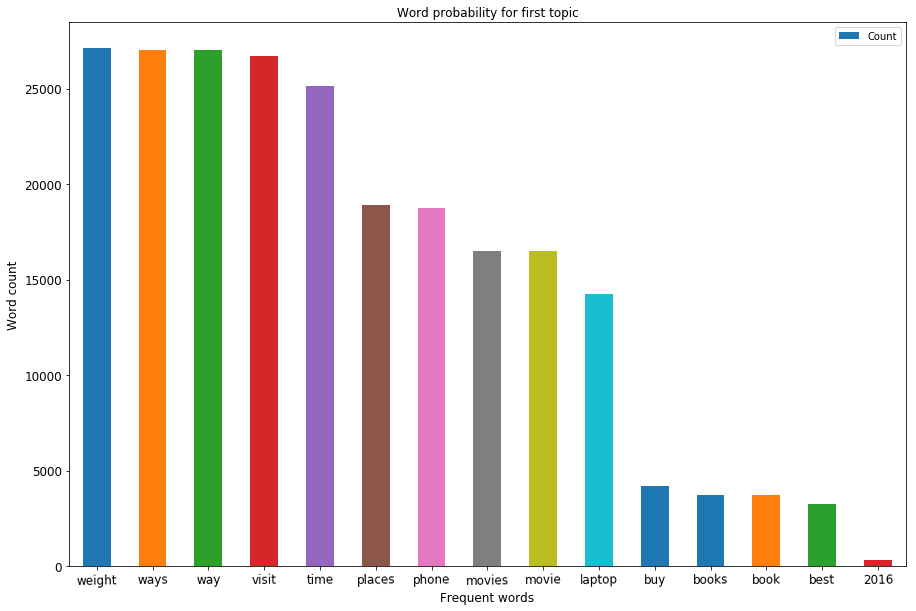

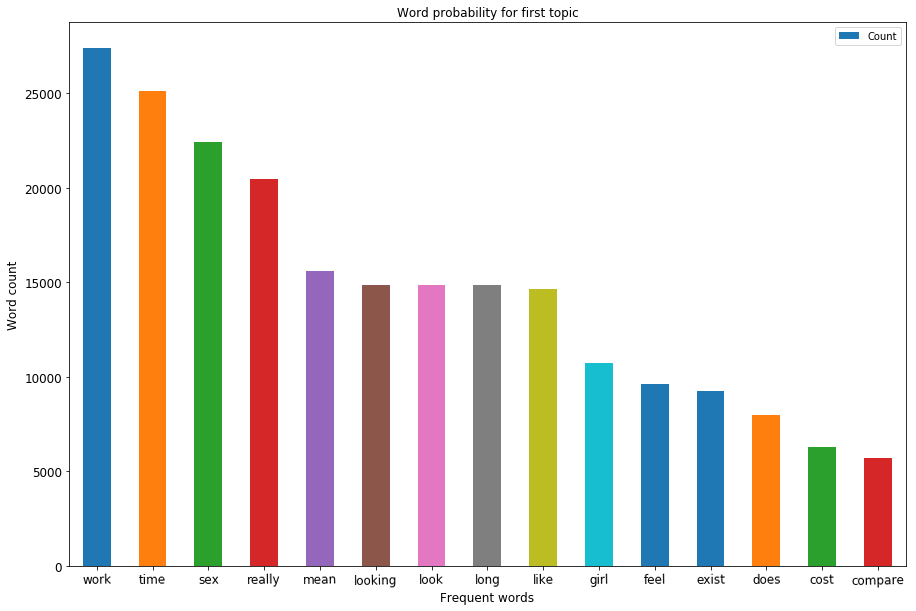

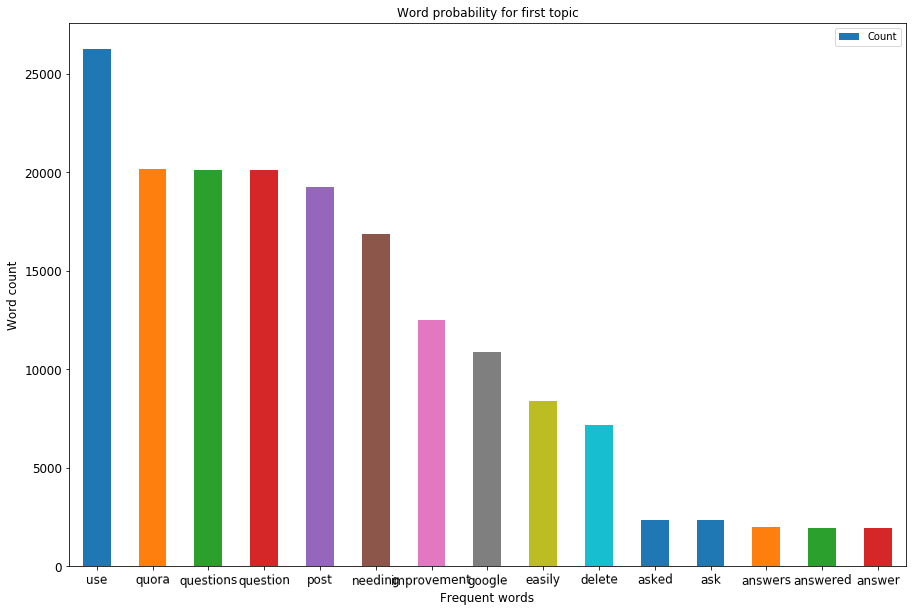

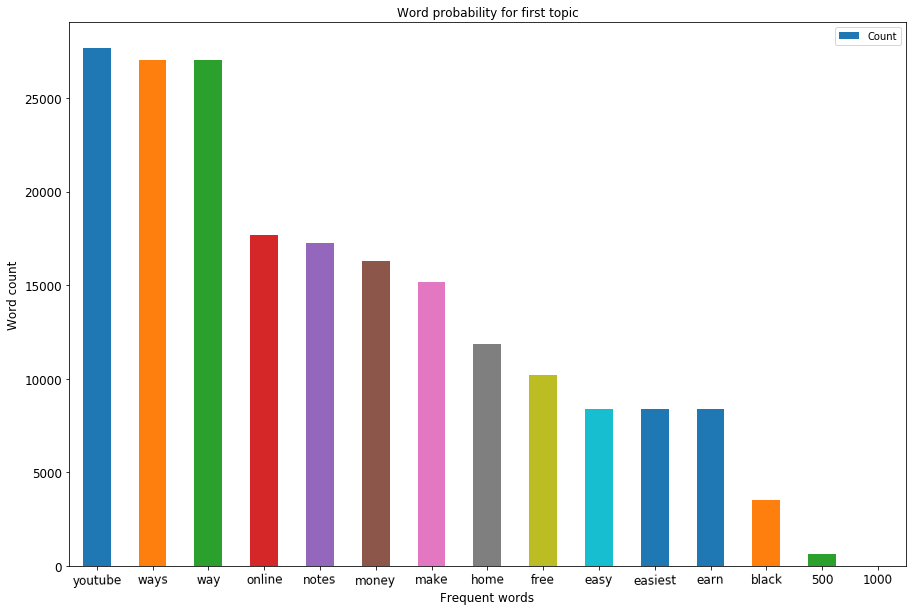

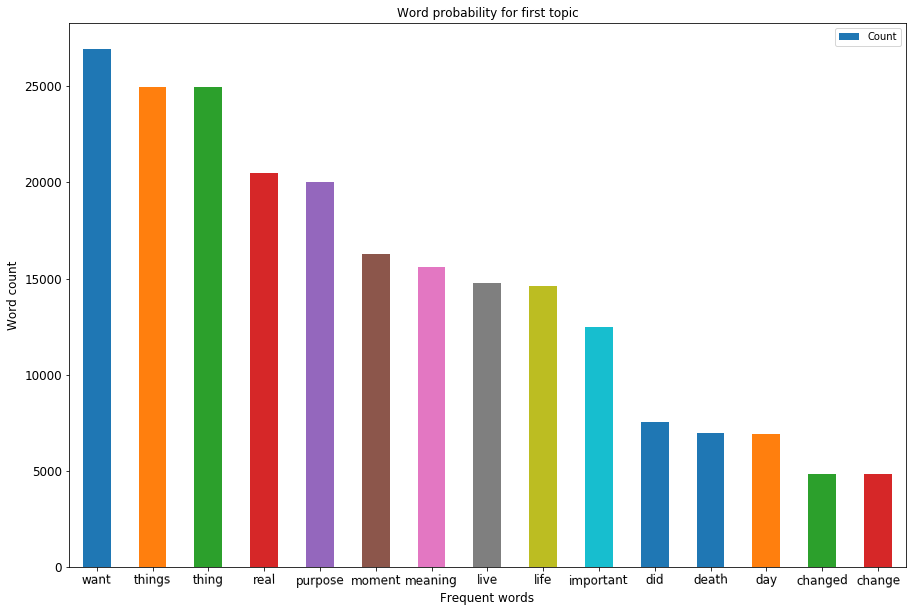

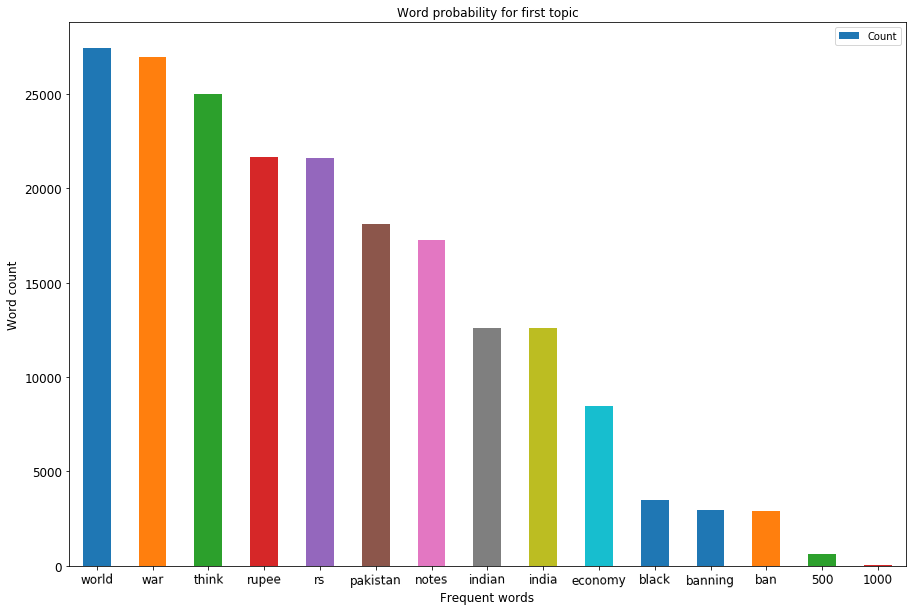

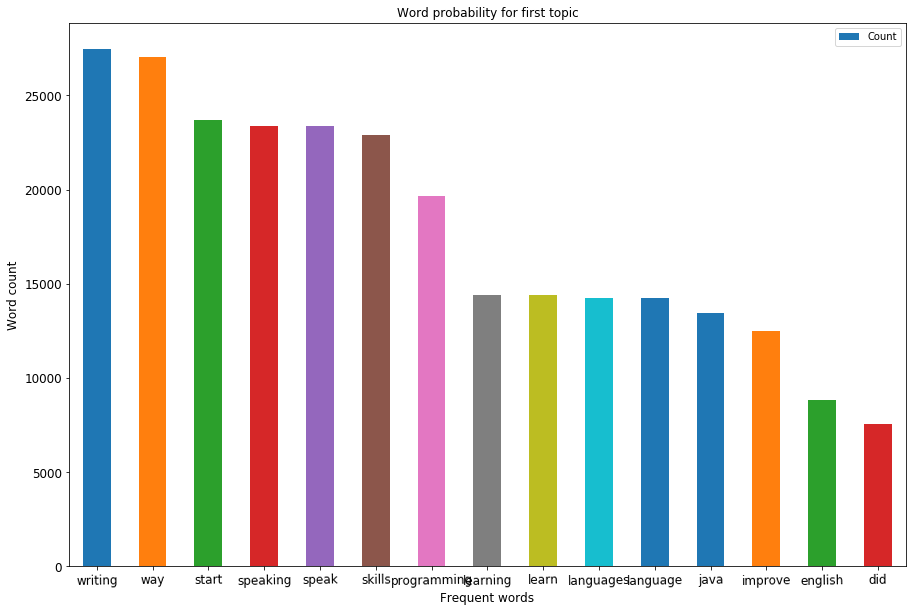

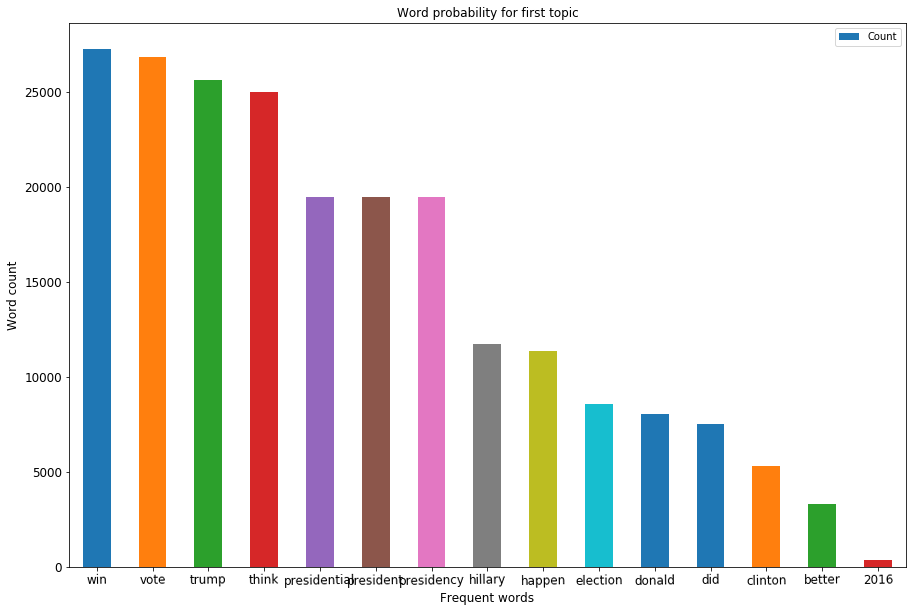

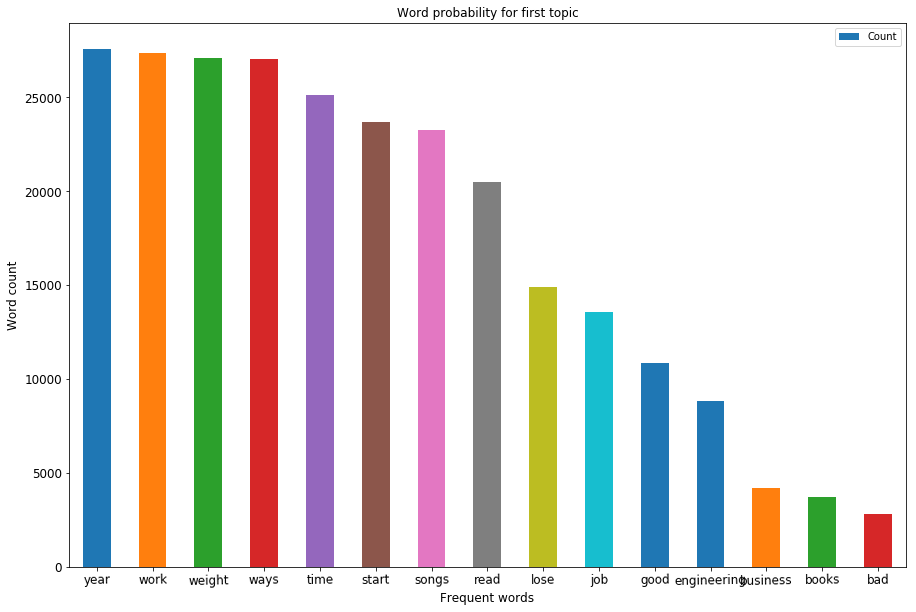

In [399]:
for i in range(0, 9):
    _topic = nmf_model.components_[i]
    word_list = []
    probability_list = []
    for index in _topic.argsort()[-15:]:
        frequent_word = dtm_with_tfidf_feature_names[index]
        # print(frequent_word, sep=" ")
        word_list.append(frequent_word)
        probability_list.append(index)
    show_chart(word_list, probability_list, "Word probability for first topic")
    

In [362]:
word_list = []
probability_list = []

top_number = 15
count = 0
for probability_number in nmf_model.components_: # model.components contains the prob of each word for each doc
    text_message = f"Top words for topic {count} are : "
    print(text_message)    
    for number in probability_number.argsort()[-top_number:]: # we're only interested in the top words
        print([dtm_with_tfidf_feature_names[number]], end= "")
        word_list.append([dtm_with_tfidf_feature_names[number]])
        probability_list.append(number)
    print("\n")  
    count += 1

Top words for topic 0 are : 
['visit']['places']['phone']['buy']['weight']['time']['laptop']['ways']['movie']['2016']['books']['book']['movies']['way']['best']

Top words for topic 1 are : 
['looking']['look']['exist']['girl']['compare']['cost']['really']['time']['sex']['long']['work']['feel']['like']['mean']['does']

Top words for topic 2 are : 
['use']['answered']['post']['needing']['easily']['improvement']['delete']['asked']['google']['answers']['answer']['ask']['question']['questions']['quora']

Top words for topic 3 are : 
['free']['easiest']['easy']['home']['notes']['500']['1000']['black']['youtube']['ways']['way']['earn']['online']['make']['money']

Top words for topic 4 are : 
['death']['did']['live']['changed']['want']['change']['things']['moment']['real']['day']['thing']['important']['meaning']['purpose']['life']

Top words for topic 5 are : 
['think']['economy']['black']['world']['ban']['banning']['indian']['rupee']['rs']['war']['pakistan']['1000']['notes']['500']['india']



In [363]:
# storing an array of arrays of index positions 
# of words of each row/question
textfile_topics = nmf_model.transform(dtm_with_tfidf)

In [364]:
textfile_topics.shape

(200000, 10)

In [396]:
topic_list = []

for popular_index_pos in textfile_topics:
    # storing the max index position in each array 
    # of array and storing it in the topic_list array 
    topic_list.append(popular_index_pos.argmax())

# storing the topic_list as a new coloumn 
# depecting the topic index in our original
# dataframe
df["topic_num"] = topic_list

In [397]:
df

,question,topic_num,topic
0,What is the step by step guide to invest in sh...,5,World Politics
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,0,Opinions
2,How can I increase the speed of my internet co...,3,Finances/Earning Money
3,Why am I mentally very lonely? How can I solve...,9,Relationship
4,"Which one dissolve in water quikly sugar, salt...",1,"Recreation, Sports, Travel, and Activities"
5,Astrology: I am a Capricorn Sun Cap moon and c...,1,"Recreation, Sports, Travel, and Activities"
6,Should I buy tiago?,0,Opinions
7,How can I be a good geologist?,8,Career and Motivation
8,When do you use ã‚· instead of ã—?,2,Quora
9,Motorola (company): Can I hack my Charter Moto...,5,World Politics


In [368]:
df.loc[df['topic_num'] == 0].sample(5)

,question,topic_num
170382,Which is the best book for python?,0
183286,What are some of the best phones gadgets?,0
169593,What is Star Trek?,0
8617,What is the best way to control our emotions?,0
28698,What is the easier way to understand the conce...,0


In [380]:
df.loc[df['topic_num'] == 1].sample(5)

,question,topic_num
109919,How do you feel about music?,1
71898,In what way does the fake currency detector wo...,1
162082,What are the prerequisites for understanding R...,1
46094,Does our mind control our emotions?,1
170323,What is venture debt and how it works?,1


In [370]:
df.loc[df['topic_num'] == 2].sample(5)

,question,topic_num
119900,Is there advertising on Quora?,2
178466,What are the best ways to advertise on Quora?,2
26568,What went wrong with Yahoo Labs?,2
46359,Who are the contemporary Hindi poets I must fo...,2
29670,"Why should we ask questions on Quora, when we ...",2


In [371]:
df.loc[df['topic_num'] == 3].sample(5)

,question,topic_num
19275,"If you had a billion dollars, what would you d...",3
132679,How can I earn money easily online?,3
77816,How do astrologers make money?,3
58460,How can I earn money part time online?,3
6237,What would happend to me I dont tip in USA? Wo...,3


In [372]:
df.loc[df['topic_num'] == 4].sample(5)

,question,topic_num
108507,How did Life (2017 movie) get greenlit? What's...,4
169460,Can you change the team in PokÃ©mon GO?,4
11792,What is your wildest honeymoon experience?,4
138264,I have an untreatable and life-long disabling ...,4
96073,I'm 21 and dont have a purpose what should I do?,4


In [373]:
df.loc[df['topic_num'] == 5].sample(5)

,question,topic_num
14337,Which country constitution is ideal democratic...,5
54,How GST affects the CAs and tax officers?,5
139420,Why has the Modi Government banned the 500 and...,5
68054,Why is Saltwater taffy candy imported in China?,5
163330,Why do hotels in India confiscate the passport...,5


In [374]:
df.loc[df['topic_num'] == 6].sample(5)

,question,topic_num
105475,"For an MS in mechanical, which taught program ...",6
43095,How do I increase confidence in public speaking?,6
47338,What is the best programming language I should...,6
18377,How should I start for upsc preparation?,6
45072,What are the contexts of development?,6


In [375]:
df.loc[df['topic_num'] == 7].sample(5)

,question,topic_num
117727,What do Europeans think of Donald Trump?,7
22663,What is it like to be the President? In general.,7
15515,Am I eligible for working in the USA?,7
160185,"Where did the phrase ""actions speak louder tha...",7
107856,What would happen if Russia invaded Poland?,7


In [376]:
df.loc[df['topic_num'] == 8].sample(5)

,question,topic_num
72487,How do I get prepared for SSC CGL tier III des...,8
183817,How can a fresher get a job in Delhi?,8
198648,In what manner are the planets in our solar sy...,8
2402,What is the health condition of Jayalalitha?,8
19261,Why was it impossible to rescue Omayra SÃ¡nchez?,8


In [377]:
df.loc[df['topic_num'] == 9].sample(5)

,question,topic_num
16477,What makes a girl love a boy?,9
58422,"What is the origin of saying ""bless you"" when ...",9
127201,What comes to your mind when you hear the term...,9
72677,How do you find the total number of left and r...,9
26234,How common is it for women to cheat? What moti...,9


In [382]:
topic_list = {0: "Opinions", 
              1: "Recreation, Sports, Travel, and Activities", 
              2: "Quora", 
              3: "Finances/Earning Money", 
              4: "Life", 
              5: "World Politics", 
              6: "Learning, Programming, and Education", 
              7: "US Presedential Elections", 
              8: "Career and Motivation", 
              9: "Relationship"}

topic = df["topic_num"].map(topic_list)
df["topic"] = topic

In [384]:
df.head(25)

,question,topic_num,topic
0,What is the step by step guide to invest in sh...,5,World Politics
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,0,Opinions
2,How can I increase the speed of my internet co...,3,Finances/Earning Money
3,Why am I mentally very lonely? How can I solve...,9,Relationship
4,"Which one dissolve in water quikly sugar, salt...",1,"Recreation, Sports, Travel, and Activities"
5,Astrology: I am a Capricorn Sun Cap moon and c...,1,"Recreation, Sports, Travel, and Activities"
6,Should I buy tiago?,0,Opinions
7,How can I be a good geologist?,8,Career and Motivation
8,When do you use ã‚· instead of ã—?,2,Quora
9,Motorola (company): Can I hack my Charter Moto...,5,World Politics


In [385]:
df.to_csv('nmf_modelled.csv')